In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Importing necessary libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
import os
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture as GMM
from sklearn.cluster import KMeans
for dirname, _, filenames in os.walk('dirname'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# **Loading Input Image**

In [3]:
dpath="/content/drive/MyDrive/agriculturedset/Unguided_Lab_03"
ipath=dpath+"/"+"img.png"
gtipath=dpath+"/"+"img_groundtruth.png"

# Input Image Visualization

In [5]:
import matplotlib.pyplot as plt
#iam suppyling the image path as img and resultant image is visualised
def visualize_image(img):
    # Insert your code here to visualize a given imag
    img=cv2.imread(img)
    cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)

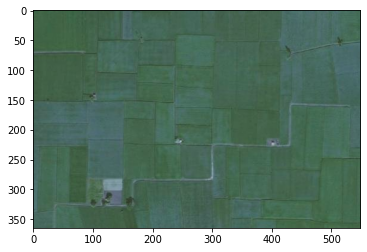

In [6]:
visualize_image(ipath)

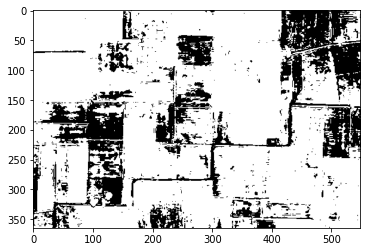

In [7]:
visualize_image(gtipath)

# Fitting k-means clustering

In [8]:
trimg=cv2.imread(ipath)
validimg=cv2.imread(gtipath)

In [9]:
dset=[]
vdset=[]
for i in range(trimg.shape[0]):
  for j in range(trimg.shape[1]):
    dset.append(trimg[i][j])
    vdset.append(validimg[i][j])
print('dset  and vdset transformed into points')

dset  and vdset transformed into points


In [10]:
cstk = KMeans(n_clusters=2, random_state=0).fit(dset)
lbi=cstk.labels_


# Clustered Image Visualization [k-means]

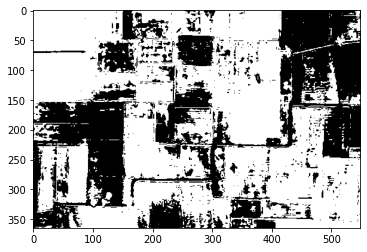

In [11]:
lb1=lbi.reshape(365,549)#reshaping the labels to generate  image
plt.imshow(lb1,cmap='gray')

In [ ]:
for i in range(validimg.shape[0]):
  for j in range(20):
    #print(validimg[i][j])


# Fitting Gaussian Mixture Model

In [14]:
gmm = GMM(n_components=2).fit(dset)
labelsgmm = gmm.predict(dset)

In [ ]:
print(labelsgmm.shape)

(200385,)


# Clustered Image Visualization [GMM]

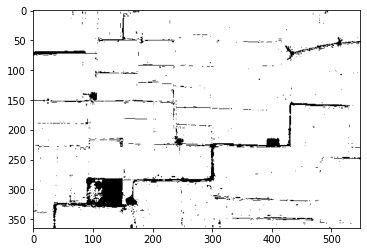

In [15]:
labelsgmm=labelsgmm.reshape(365,549)#reshaping the labels to generate  image
plt.imshow(labelsgmm,cmap='gray')

# Model Evaluation

converting the labeled ground truth image into 2d manually 


In [16]:
validimg.shape
validimg2shape=[]
for i in range(validimg.shape[0]):
  t=[]
  for j in range(validimg.shape[1]):
    if( validimg[i][j][0]>0 and validimg[i][j][1]>0 and validimg[i][j][2]>0):
      t.append(1)
    else:
      t.append(0)
  validimg2shape.append(t)


print(validimg2shape[1][1])

1


error function custom defined to check whether each pixel has same clustered label or not

In [17]:
def error(validimg,mylabels):
  mismatch=0
  for i in range(mylabels.shape[0]):
    for j in range(mylabels.shape[1]):
      if(validimg[i][j]!=int(mylabels[i][j])):
        mismatch+=1
  return mismatch/(mylabels.shape[0]*mylabels.shape[1])



In [18]:
e1=error(validimg2shape,lb1)
e2=error(validimg2shape,labelsgmm)
print("error in kmenas  is ",e1)
print("error in gmm  is ",e2)
print(" ")
print("accuracy in kmeans ",1-e1)
print("accuracy in gmm ",1-e2)

error in kmenas  is  0.1459290865084712
error in gmm  is  0.21591436484766824
 
accuracy in kmeans  0.8540709134915287
accuracy in gmm  0.7840856351523318
